In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from scipy import stats
import random
from sklearn import metrics
plt.rc('font', size = 8)
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Paired'))
sns.set()

In [3]:
data = pd.read_csv('Mydata.csv')
data = data.loc[:,(data != 0).any(axis = 0)]
unprocessed_dataset = data.loc[:,(data != 0).any(axis = 0)]

y = sorted(list(range(10)) *3)
sample_list = sorted(['L1T1', 'L1T2','L1T3', 'L1T4', 'L3T2', 'L3T3', 'L3T4', 'L5T3', 'L5T4', 'L7T4'] * 3)
sample_arr = np.array(sample_list)

unprocessed_dataset['y'] = y
dataset = unprocessed_dataset
X = dataset.iloc[:, :-1].values 
y_true = dataset.iloc[:, -1].values

In [4]:
sc = StandardScaler()
sc_X = sc.fit_transform(X)

pca = PCA(n_components = 10)
X_trans = pca.fit_transform(sc_X)

In [5]:
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
loadings = pd.DataFrame(pca.components_,columns = data.columns, index = pcs)
axes_pos = np.arange(len(pcs))

### Plotting PC1 vs other PCs

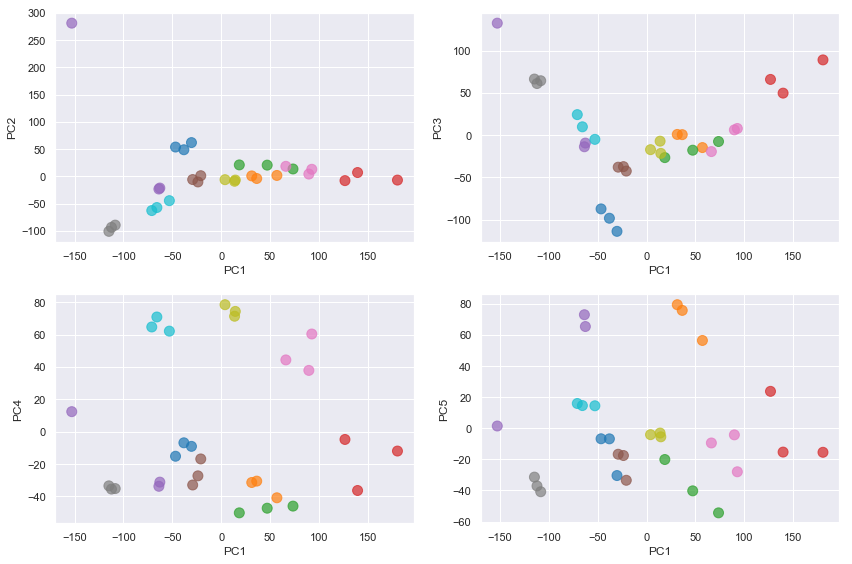

In [6]:
fig = plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.scatter(X_trans[:,0], X_trans[:,1], c = y, s = 100, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2, 2, 2)
plt.scatter(X_trans[:,0], X_trans[:,2], c = y, s = 100, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC1')
plt.ylabel('PC3')

plt.subplot(2, 2, 3)
plt.scatter(X_trans[:,0], X_trans[:,3], c = y, s = 100, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC1')
plt.ylabel('PC4')

plt.subplot(2, 2, 4)
plt.scatter(X_trans[:,0], X_trans[:,4], c = y, s = 100, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC1')
plt.ylabel('PC5')

fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
plt.tight_layout()
plt.savefig('PC1_vs_PCs.png')
plt.show()

### plotting PC2 vs other pcs

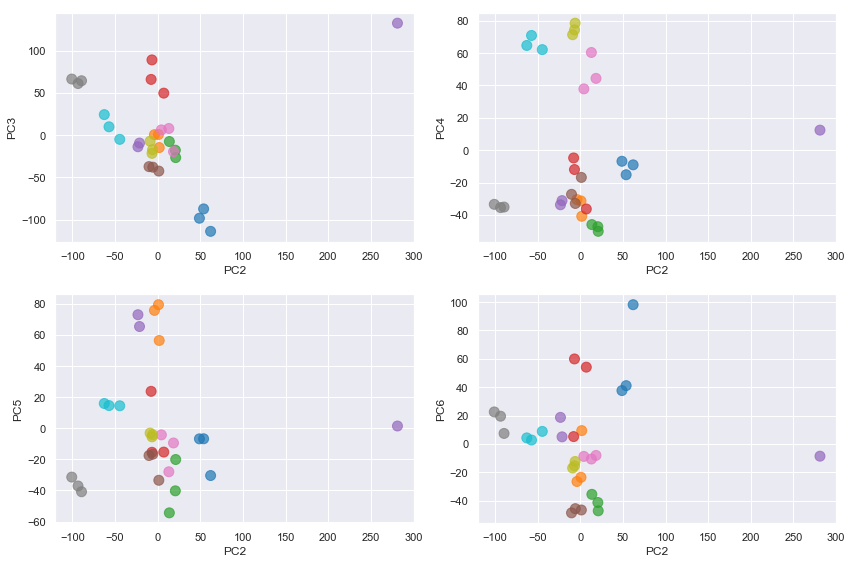

In [7]:
fig = plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.scatter(X_trans[:,1], X_trans[:,2], c = y, s = 100, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC2')
plt.ylabel('PC3')

plt.subplot(2, 2, 2)
plt.scatter(X_trans[:,1], X_trans[:,3], c = y, s = 100, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC2')
plt.ylabel('PC4')

plt.subplot(2, 2, 3)
plt.scatter(X_trans[:,1], X_trans[:,4], c = y, s = 100, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC2')
plt.ylabel('PC5')

plt.subplot(2, 2, 4)
plt.scatter(X_trans[:,1], X_trans[:,5], c = y, s = 100, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC2')
plt.ylabel('PC6')

fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
plt.tight_layout()
plt.savefig('PC2_vs_PCs.png')
plt.show()

### Scree Plot

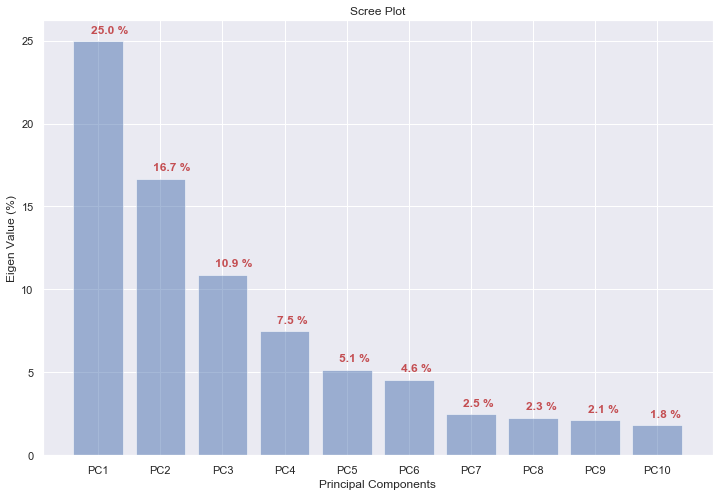

In [8]:
eigen_val = (pca.explained_variance_ratio_[:10]) * 100

fig, ax = plt.subplots(figsize = (12,8))

plt.bar(axes_pos, eigen_val, align='center', alpha = 0.5, label = eigen_val)
for ind, val in enumerate(eigen_val):
    ax.text(ind - 0.12, val + .5, ("{} %".format(round(val, 1))), color = 'r', fontweight = 'bold')
plt.xticks(axes_pos, pcs)
plt.xlabel('Principal Components')
plt.ylabel('Eigen Value (%)')
plt.title('Scree Plot')
plt.show()

### Explained Variance Ratio, total Variance of the PCs

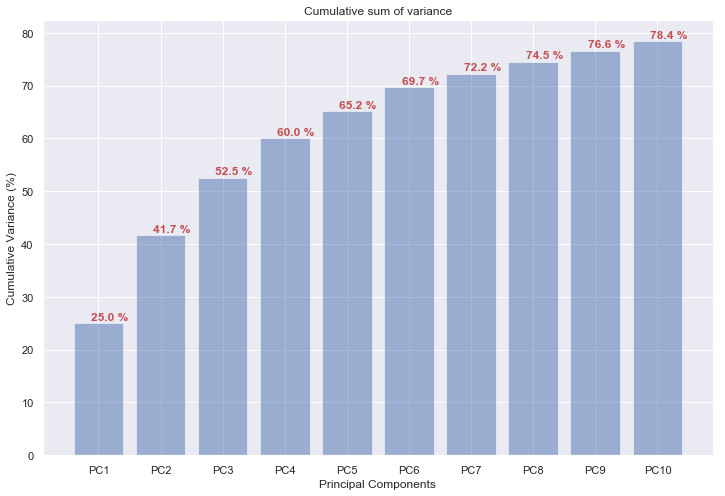

In [10]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_ ) * 100

fig, ax = plt.subplots(figsize = (12,8))
plt.bar(axes_pos, cumulative_var, align = 'center', alpha = 0.5, label = eigen_val)
for ind, val in enumerate(cumulative_var):
    ax.text(ind - 0.12, val + .6, ("{} %".format(round(val, 1))), color = 'r', fontweight = 'bold')
plt.xticks(axes_pos, pcs)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance (%)')
plt.title('Cumulative sum of variance')
plt.show()

### Plotting histogram of the loadings of PCS

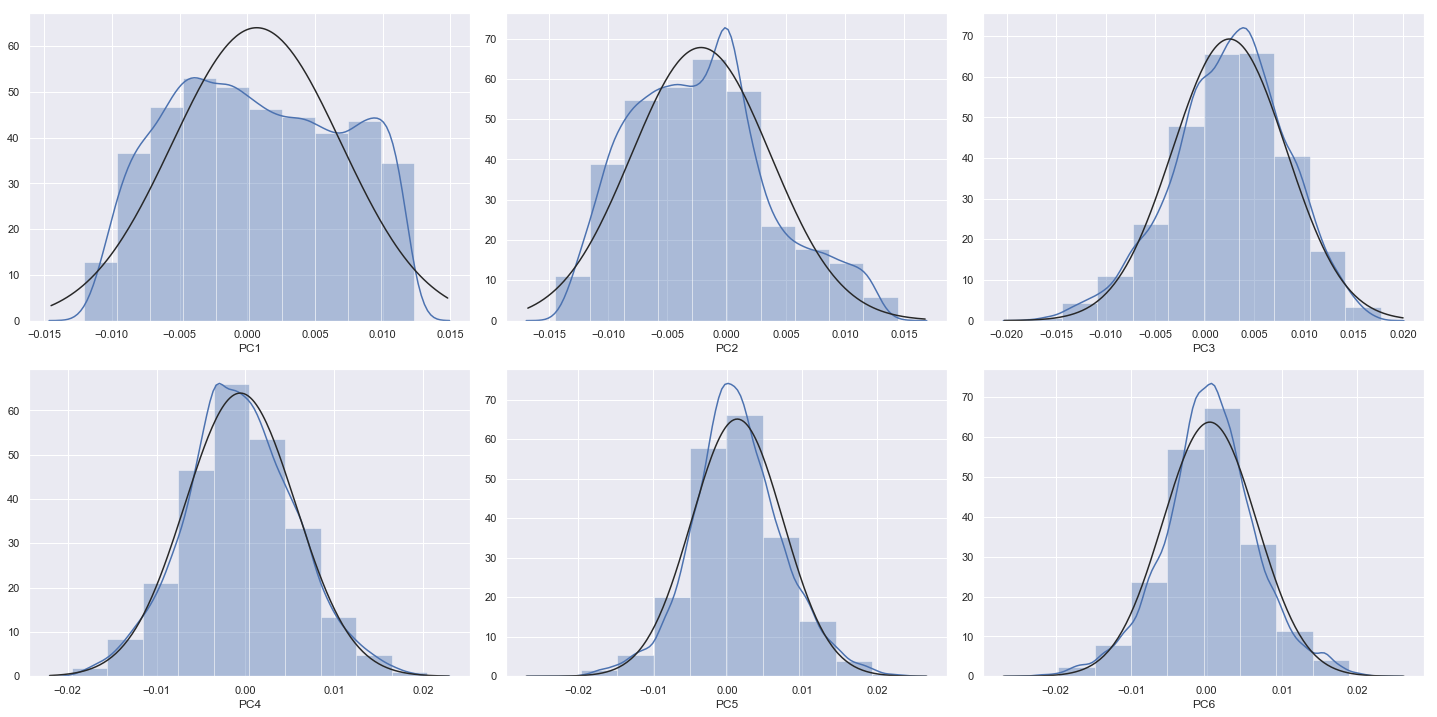

In [11]:
from scipy.stats import norm

fig = plt.figure(figsize = (20, 10))
plt.rc('font', size = 8)

plt.subplot(2, 3, 1)
sns.distplot(loadings.loc['PC1'], fit = norm, bins = 10, axlabel = 'PC1', rug = False)

plt.subplot(2, 3, 2)
sns.distplot(loadings.loc['PC2'], fit = norm, bins = 10, axlabel = 'PC2', rug = False)

plt.subplot(2, 3, 3)
sns.distplot(loadings.loc['PC3'], fit = norm, bins = 10, axlabel = 'PC3', rug = False)

plt.subplot(2, 3, 4)
sns.distplot(loadings.loc['PC4'], fit = norm, bins = 10, axlabel = 'PC4', rug = False)

plt.subplot(2, 3, 5)
sns.distplot(loadings.loc['PC5'], fit = norm, bins = 10, axlabel = 'PC5', rug = False)

plt.subplot(2, 3, 6)
sns.distplot(loadings.loc['PC6'], fit = norm, bins = 10, axlabel = 'PC6', rug = False)

fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
plt.tight_layout()
plt.show()

### Finding the subset of genes those contribute the most on PCs

In [12]:
def variable_contrib(index_n):
    pc_loadings = loadings.loc[loadings.index[index_n]].to_frame().abs()
    sorted_loadings = pc_loadings.sort_values(pcs[index_n], ascending = False)
    gene_contrib = sorted_loadings.loc[(sorted_loadings[pcs[index_n]] >= 0.01)].T
    genes = gene_contrib.columns.values.tolist()
    
    return gene_contrib, genes

### Top 10 genes contributes the most on PCs

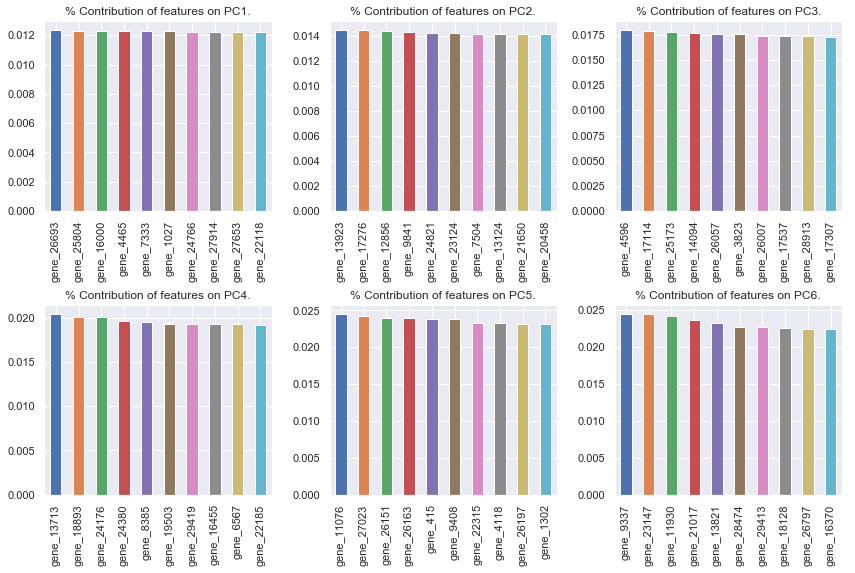

In [13]:
fig = plt.figure(figsize = (12, 8))

plt.subplot(2, 3, 1)
gene_contrib = variable_contrib(0)[0]
gene_contrib.iloc[0, 0:10].plot(kind = 'bar', title = '% Contribution of features on {}.'.format(list(gene_contrib.index)[0]))

plt.subplot(2, 3, 2)
gene_contrib = variable_contrib(1)[0]
gene_contrib.iloc[0, 0:10].plot(kind = 'bar', title = '% Contribution of features on {}.'.format(list(gene_contrib.index)[0]))

plt.subplot(2, 3, 3)
gene_contrib = variable_contrib(2)[0]
gene_contrib.iloc[0, 0:10].plot(kind = 'bar', title = '% Contribution of features on {}.'.format(list(gene_contrib.index)[0]))

plt.subplot(2, 3, 4)
gene_contrib = variable_contrib(3)[0]
gene_contrib.iloc[0, 0:10].plot(kind = 'bar', title = '% Contribution of features on {}.'.format(list(gene_contrib.index)[0]))

plt.subplot(2, 3, 5)
gene_contrib = variable_contrib(4)[0]
gene_contrib.iloc[0, 0:10].plot(kind = 'bar', title = '% Contribution of features on {}.'.format(list(gene_contrib.index)[0]))

plt.subplot(2, 3, 6)
gene_contrib = variable_contrib(5)[0]
gene_contrib.iloc[0, 0:10].plot(kind = 'bar', title = '% Contribution of features on {}.'.format(list(gene_contrib.index)[0]))

fig.subplots_adjust(hspace = 0.05, wspace = 0.1)
plt.tight_layout()
plt.show()

### Creating dataframe using 200 top contributed genes per PC

In [20]:
genes_pc1 = variable_contrib(0)[1][:200]
genes_pc2 = variable_contrib(1)[1][:200]
genes_pc3 = variable_contrib(2)[1][:200]
genes_pc4 = variable_contrib(3)[1][:200]
genes_pc5 = variable_contrib(4)[1][:200]
genes_pc6 = variable_contrib(5)[1][:200]

total_genes_onPCS = list(set(genes_pc1 + genes_pc2 + genes_pc3 + genes_pc4 + genes_pc5 + genes_pc6))


### to sort the gene names in order

In [23]:
import re

def stringSplitByNumbers(x):
    num_expression = re.compile('(\d+)')
    variable_split = num_expression.split(x)
    
    return [int(i) if i.isdigit() else i for i in variable_split]

total_genes_onPCS = sorted(total_genes_onPCS, key = stringSplitByNumbers)

In [25]:
new_dataFrame = data[total_genes_onPCS]
new_dataFrame['y'] = y

curated_data = new_dataFrame.to_csv('curated_dataset_6PCs_200.csv', index = False)
new_dataFrame.head()

C:\Users\Tamal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,gene_24,gene_43,gene_81,gene_101,gene_167,gene_181,gene_183,gene_234,gene_254,gene_268,...,gene_29247,gene_29259,gene_29279,gene_29314,gene_29358,gene_29361,gene_29413,gene_29419,gene_29421,y
0,18.282823,7.887802,97.957450,15.913259,120.539594,204.815275,35.392476,5.137836,14.687899,3.774307,...,12.239395,45.070848,18.453690,3.782028,0.000000,44.776727,0.080645,9.709891,23.345776,0
1,17.627633,8.480760,125.936835,19.025670,117.870273,224.880052,30.440515,40.967542,16.107655,4.297044,...,8.895434,30.945752,19.379024,2.464815,0.226585,40.483628,0.644108,12.005895,20.120461,0
2,16.181643,7.510810,122.745412,21.863618,148.827543,235.552790,30.835126,9.286777,16.902123,5.252224,...,10.009199,34.438639,24.444959,4.052885,0.000000,42.877246,0.155071,5.461129,21.294740,0
3,23.749110,11.441159,161.355404,13.187146,100.564564,243.662386,42.040632,2.242272,13.213069,6.313623,...,10.143890,72.693385,19.550462,7.998666,0.000000,51.092167,0.114767,3.204253,23.143101,1
4,23.345511,11.503798,184.559487,12.002127,66.521962,289.200809,41.805291,8.102137,16.306863,5.081485,...,14.733571,53.684390,20.054514,8.868358,0.000000,52.888530,0.097078,3.511199,21.798024,1
